In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import ptitprince as pt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
import pingouin as pg
import statsmodels.api as sm
# import language_tool_python as ltp
import sys
sys.path.append('..')  
from src.visualization.plot import raincloud, raincloud2, RainCloud
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

#disable warnings
# outside of outdated, useless and annoying warnings
import warnings
warnings.filterwarnings('ignore')

    

In [3]:
df = pd.read_csv('../data/processed/dv2_dv3_dv2h_cleaned.csv')

# just print some descriptive info
for engine in df.engine.unique():
    print('Experiment=', end=' ')
    print(engine)
    print('-'*15)
    # print n subject
    print('N datasets =', end=' ')
    # group by engine and prolific_id, then count unique dataset_id
    dd = df[df.engine==engine].groupby(['prolific_id']).dataset_id.unique()
    n = sorted([i[0] for i in dd.values])
    print(len(n))
    print('N participants =', end=' ')
    print(df[df.engine==engine].dataset_id.nunique())

    # check if n unique dataset_id == n unique prolific_id
    if len(n) != df[df.engine==engine].dataset_id.nunique():
        print('WARNING: n unique dataset_id != n unique prolific_id')
        # show which dataset_id is doubled
        print('Doubled dataset_id=', end=' ')
        print([i for i in n if n.count(i) > 1])

    print('N trials = ', end='')
    # print n trials per subject
    print(df[df.engine==engine].prolific_id.value_counts().unique()[0])
    print()


Experiment= dv2
---------------
N datasets = 77
N participants = 77
N trials = 46

Experiment= dv3
---------------
N datasets = 76
N participants = 76
N trials = 45

Experiment= dv2_humanized
---------------
N datasets = 77
N participants = 77
N trials = 46



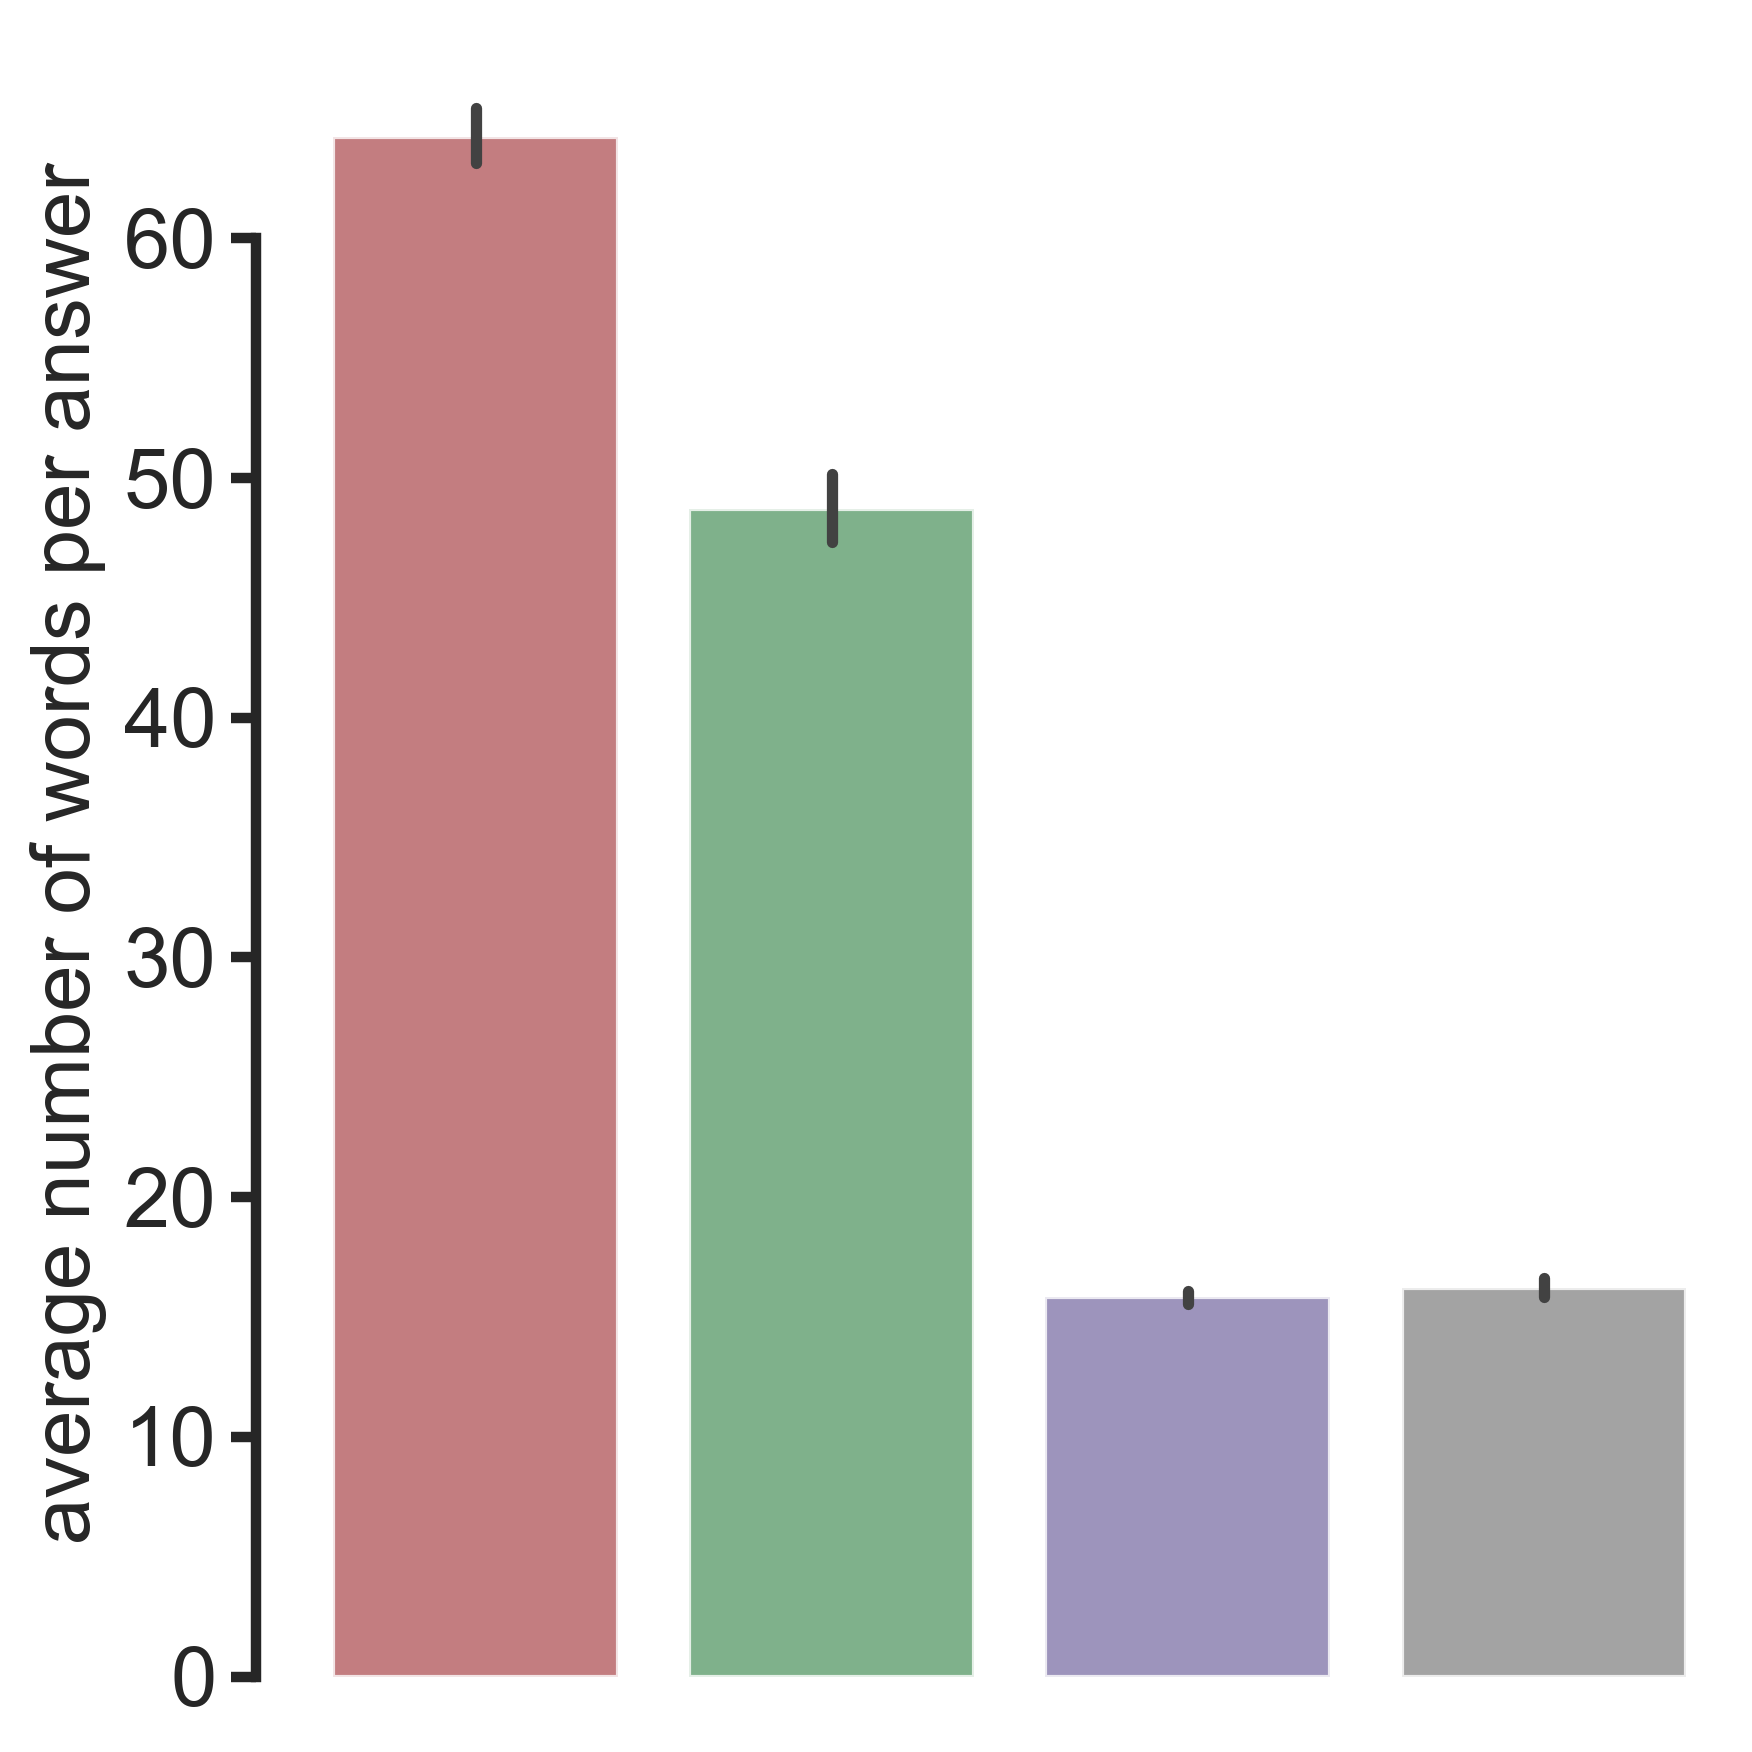

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd
import numpy as np

sns.set(
    rc={'figure.figsize':(6,6), "figure.dpi": 300, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
# sns.set_palette('Set2')
sns.set_palette('Set2')
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

# change axes width
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5

pal = sns.color_palette('deep')
pal = (list(pal[2:5]) + [pal[7]])
# invert color 0 and 1
pal[0], pal[1] = pal[1], pal[0]
sns.set_palette(pal)
sns.set_style("ticks")

# df = df[df.source=='AI']
# compute average number of words for a1
df['len'] = df['a1'].apply(lambda x: len(x.split()))

# remove Human source from DV3, DV2 humanized
df2 = df[~((df.source=='Human') & (df.engine=='dv3'))]
df2 = df2[~((df2.source=='Human') & (df2.engine=='dv2_humanized'))]
df2 = df2[~((df2.source=='Human') & (df2.engine=='dv2'))]
# now add a human engine with all rows from df.source=='Human' and engine='dv2'
new_df = df[(df.source=='Human') & (df.engine=='dv2')]
new_df['engine'] = 'human'

df2 = pd.concat([df2, new_df])


sns.barplot(x='engine', y='len', data=df2, order=['dv3', 'dv2', 'dv2_humanized', 'human'], alpha=.8)
# sns.stripplot(x='source', y='len', data=df, order=['AI', 'AI humanized', 'Human'], alpha=.5, jitter=1, size=8)
plt.xlabel('')
# raincloud(x='source', y='len', markersize=8, df=df2)
plt.ylabel('average number of words per answer')
# sns.barplot(x='source', y='len', data=df.groupby(['sub_id', 'source'], as_index=False).mean())

sns.despine(offset=10, trim=True, bottom=True);

# remove ticks length x axis
plt.tick_params(axis='x', which='both', length=0)
plt.xticks([])
plt.tight_layout()


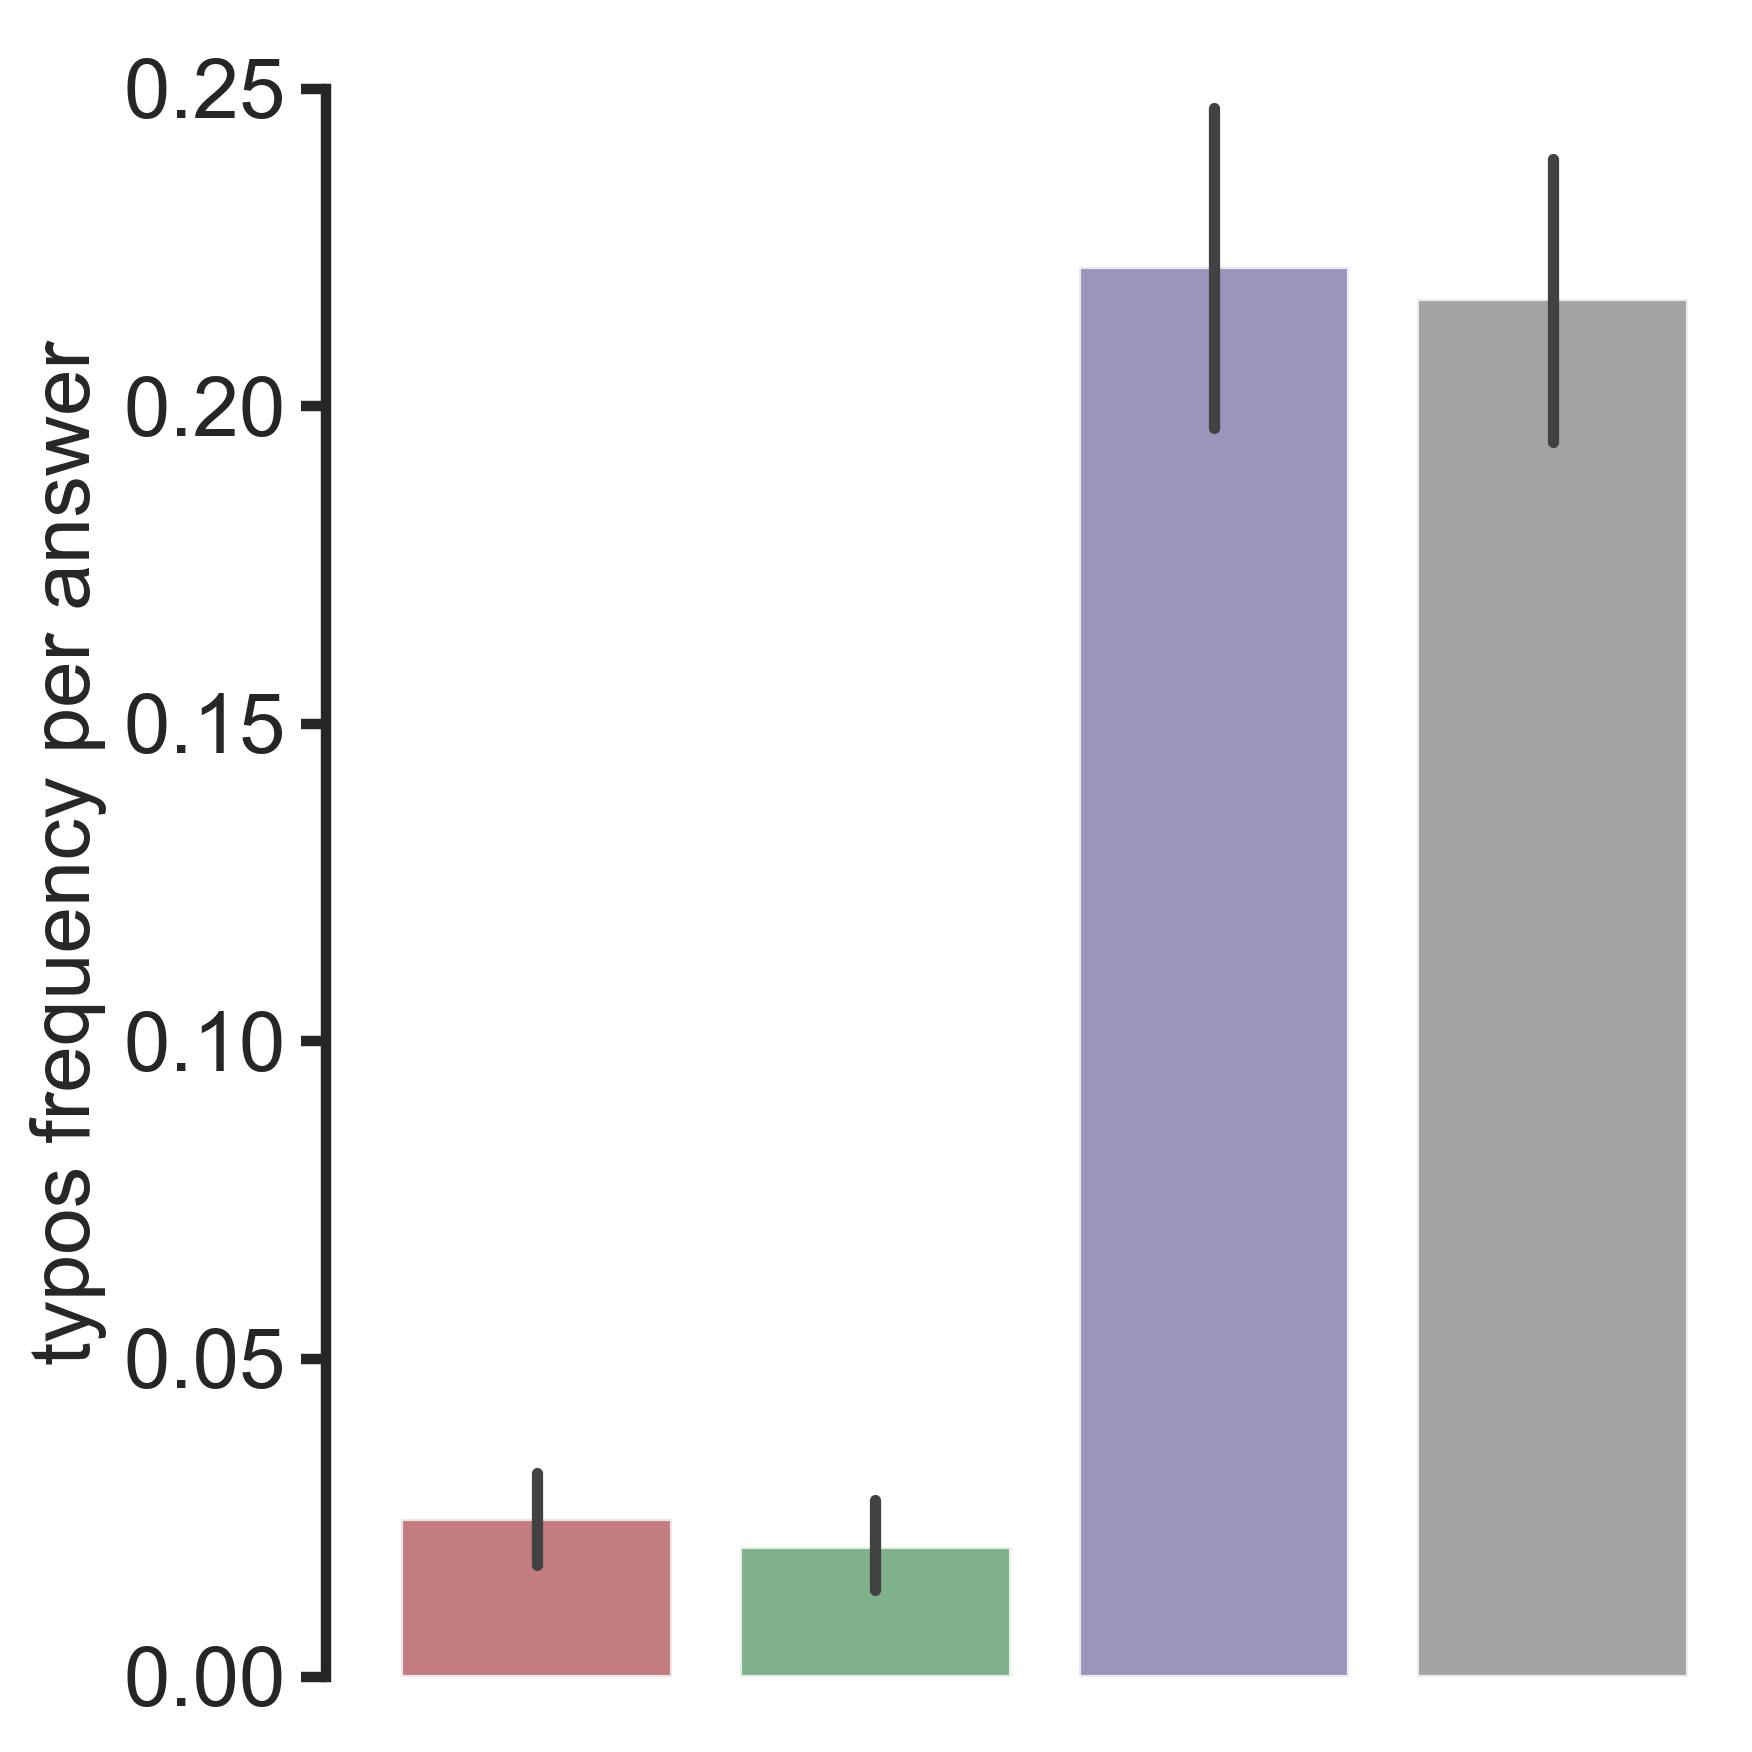

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd
import numpy as np

sns.set(
    rc={'figure.figsize':(6,6), "figure.dpi": 300, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
# sns.set_palette('Set2')
sns.set_palette('Set2')
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

# change axes width
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5

pal = sns.color_palette('deep')
pal = (list(pal[2:5]) + [pal[7]])
# invert color 0 and 1
pal[0], pal[1] = pal[1], pal[0]
sns.set_palette(pal)
sns.set_style("ticks")

# df = df[df.source=='AI']
# compute average number of words for a1
df['len'] = df['a1'].apply(lambda x: len(x.split()))

# remove Human source from DV3, DV2 humanized
df2 = df[~((df.source=='Human') & (df.engine=='dv3'))]
df2 = df2[~((df2.source=='Human') & (df2.engine=='dv2_humanized'))]
df2 = df2[~((df2.source=='Human') & (df2.engine=='dv2'))]
# now add a human engine with all rows from df.source=='Human' and engine='dv2'
new_df = df[(df.source=='Human') & (df.engine=='dv2')]
new_df['engine'] = 'human'

df2 = pd.concat([df2, new_df])


sns.barplot(x='engine', y='errors', data=df2, order=['dv3', 'dv2', 'dv2_humanized', 'human'], alpha=.8)
# sns.stripplot(x='source', y='len', data=df, order=['AI', 'AI humanized', 'Human'], alpha=.5, jitter=1, size=8)
plt.xlabel('')
# raincloud(x='source', y='len', markersize=8, df=df2)
plt.ylabel('typos frequency per answer')
# sns.barplot(x='source', y='len', data=df.groupby(['sub_id', 'source'], as_index=False).mean())

sns.despine(offset=10, trim=True, bottom=True);

# remove ticks length x axis
plt.tick_params(axis='x', which='both', length=0)
plt.xticks([])
plt.tight_layout()


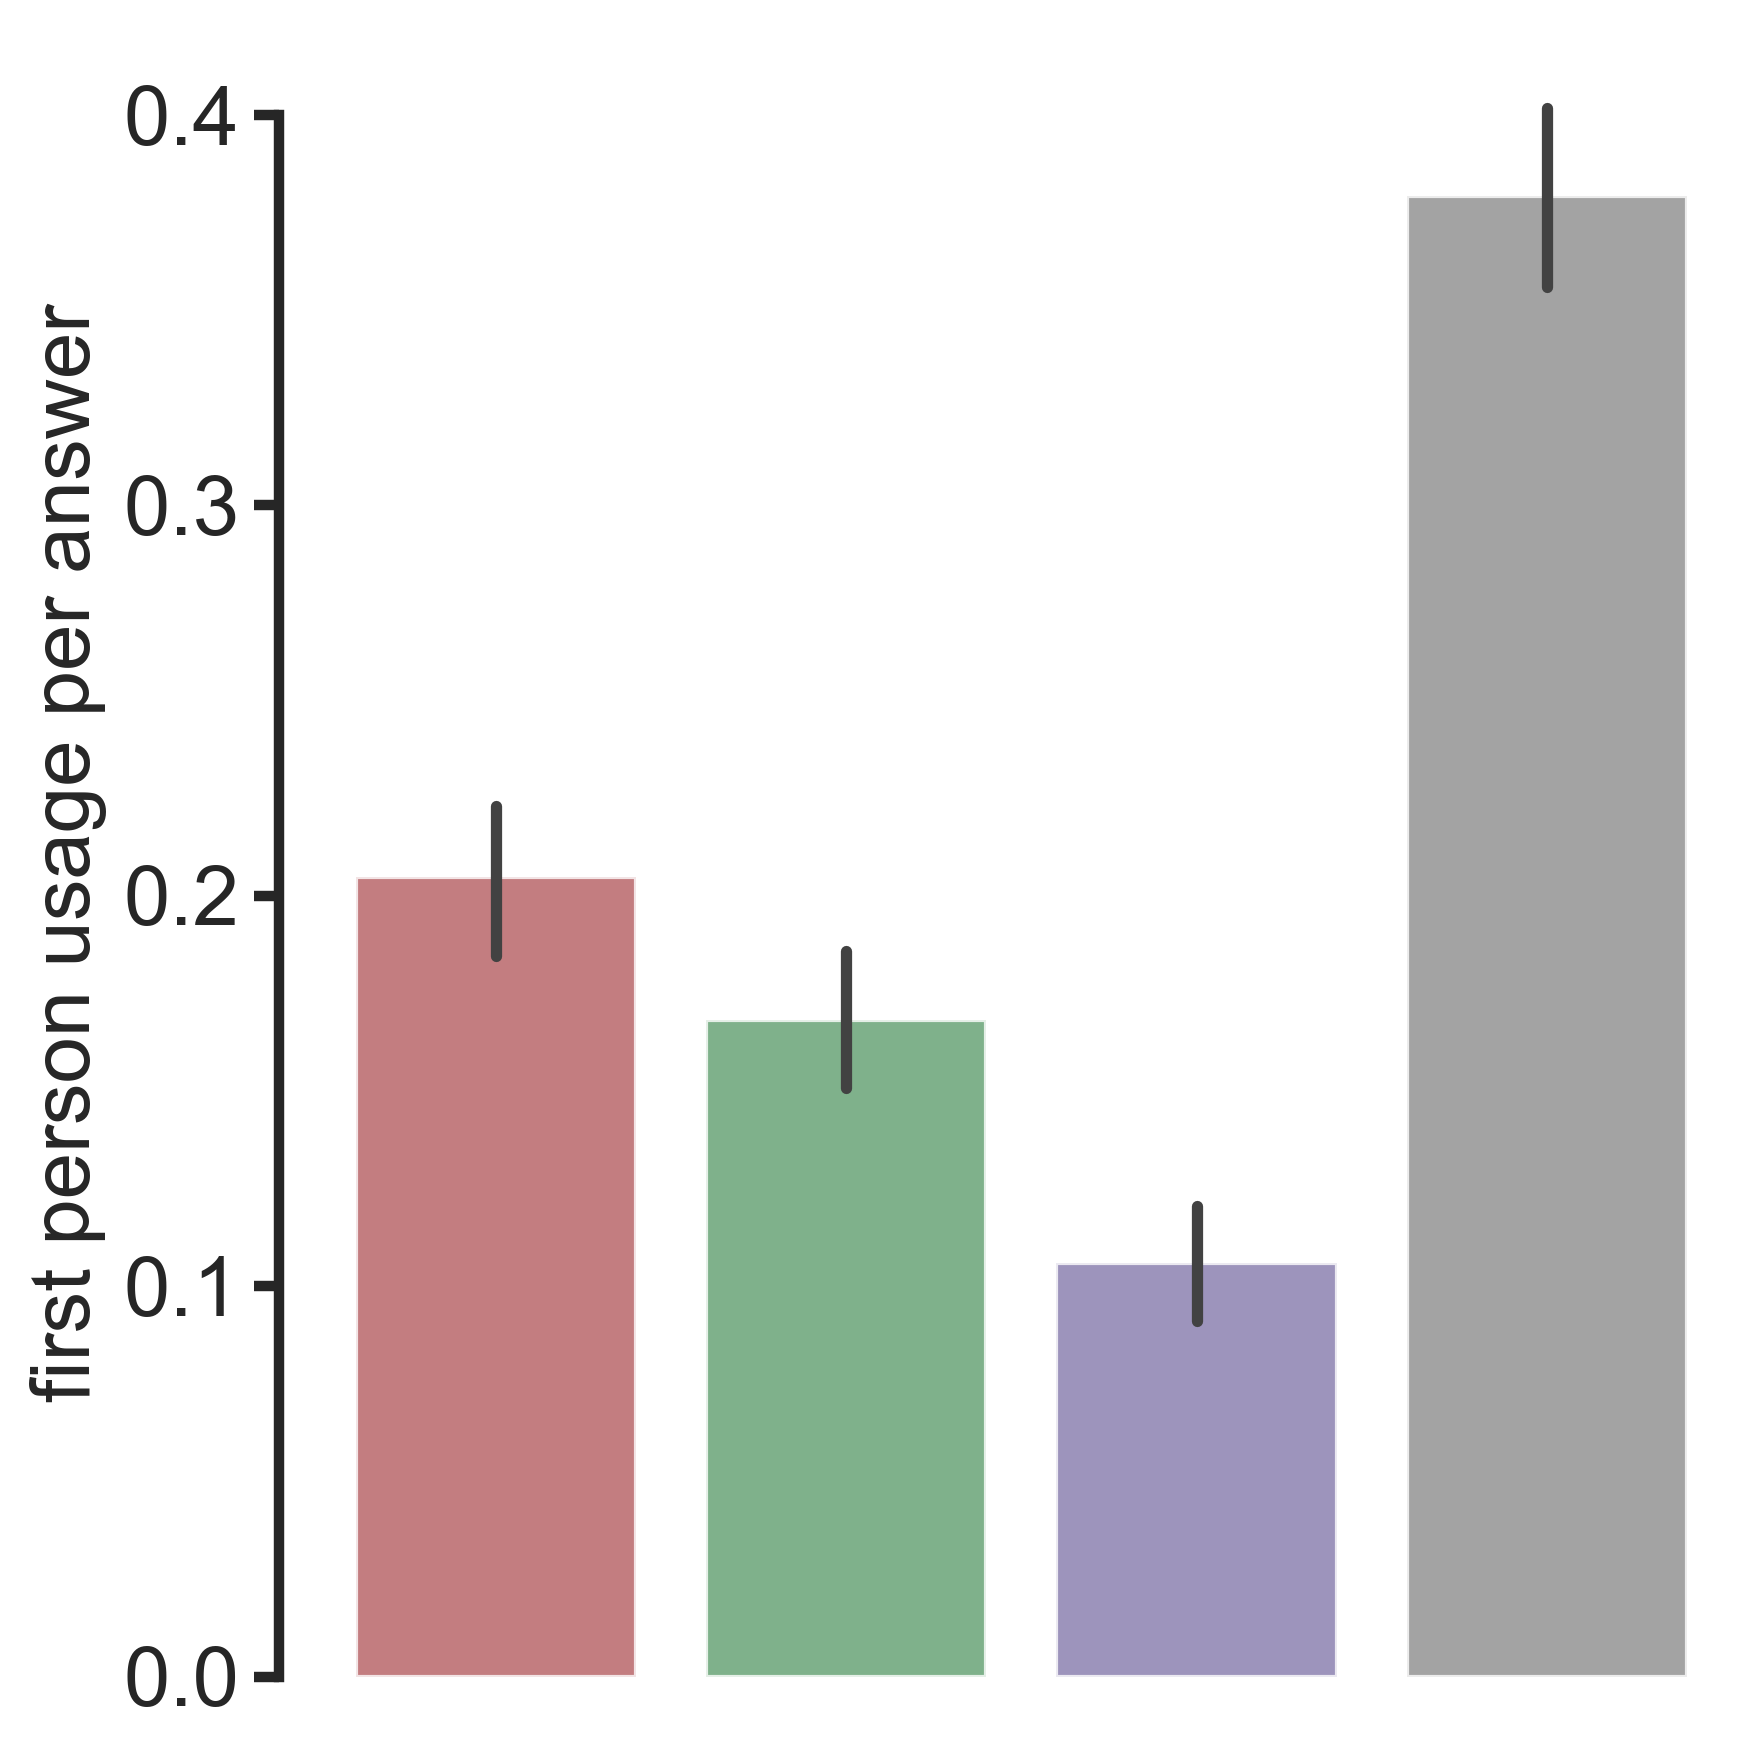

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd
import numpy as np

sns.set(
    rc={'figure.figsize':(6,6), "figure.dpi": 300, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
# sns.set_palette('Set2')
sns.set_palette('Set2')
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

# change axes width
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5

pal = sns.color_palette('deep')
pal = (list(pal[2:5]) + [pal[7]])
# invert color 0 and 1
pal[0], pal[1] = pal[1], pal[0]
sns.set_palette(pal)

sns.set_style("ticks")

def first_person(x):
    for w in x.split():
        if w.lower() in ['i', 'me', 'my', 'mine', 'myself']:
            return 1
    return 0

df['first_person'] = df['a1'].apply(lambda x: first_person(x))

# remove Human source from DV3, DV2 humanized
df2 = df[~((df.source=='Human') & (df.engine=='dv3'))]
df2 = df2[~((df2.source=='Human') & (df2.engine=='dv2_humanized'))]
df2 = df2[~((df2.source=='Human') & (df2.engine=='dv2'))]
# now add a human engine with all rows from df.source=='Human' and engine='dv2'
new_df = df[(df.source=='Human') & (df.engine=='dv2')]
new_df['engine'] = 'human'

df2 = pd.concat([df2, new_df])


sns.barplot(x='engine', y='first_person', data=df2, order=['dv2', 'dv3', 'dv2_humanized', 'human'], alpha=.8)
# sns.stripplot(x='source', y='len', data=df, order=['AI', 'AI humanized', 'Human'], alpha=.5, jitter=1, size=8)
plt.xlabel('')
# raincloud(x='source', y='len', markersize=8, df=df2)
plt.ylabel('first person usage per answer')
# sns.barplot(x='source', y='len', data=df.groupby(['sub_id', 'source'], as_index=False).mean())

sns.despine(offset=10, trim=True, bottom=True);

# remove ticks length x axis
plt.tick_params(axis='x', which='both', length=0)
plt.xticks([])
plt.tight_layout()
